# Chapter: Best Practices

# Topic: Centering & Scaling

In [1]:
# Standard scaling
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([[ 1000, 0.01,  300],
              [ 1200,  0.06,  350], 
              [ 1500,  0.1, 320]])
scaler = StandardScaler().fit(X) # computes mean & std column-wise
X_scaled = scaler.transform(X) # transform using computed mean and std

# check mean = 0 and variance = 1 for every variable/column after scaling 
print(X_scaled.mean(axis=0)) # return 1D array of size(3,1)
print(X_scaled.std(axis=0)) # return 1D array of size(3,1)

# access mean and variance via object properties
print(scaler.mean_) # return 1D array of size(3,1)
print(scaler.var_) # return 1D array of size(3,1)

[3.70074342e-16 7.40148683e-17 9.43689571e-16]
[1. 1. 1.]
[1.23333333e+03 5.66666667e-02 3.23333333e+02]
[4.22222222e+04 1.35555556e-03 4.22222222e+02]


In [2]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # create object
X_scaled = scaler.fit_transform(X) # fit & transform 

# check min = 0 and max = 1 for every variable/column after scaling 
print(X_scaled.min(axis=0))
print(X_scaled.max(axis=0))

# access min and max via object properties
print(scaler.data_min_)
print(scaler.data_max_)

[0. 0. 0.]
[1. 1. 1.]
[1.e+03 1.e-02 3.e+02]
[1.5e+03 1.0e-01 3.5e+02]


In [3]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    Robust Centering & Scaling
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

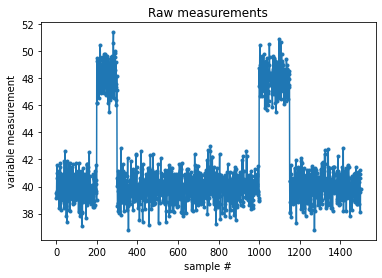

In [5]:
# Generate oulier-infested data
X = np.random.normal(40, 1, (1500,1))
X[200:300] = X[200:300] +8; X[1000:1150] = X[1000:1150] + 8

# plot
import matplotlib.pyplot as plt
plt.plot(X, '.-')
plt.xlabel('sample #'), plt.ylabel('variable measurement')
plt.title('Raw measurements')
plt.show()

Estimated mean =  41.31601389372808
Estimated standard deviation =  3.2009639545905766


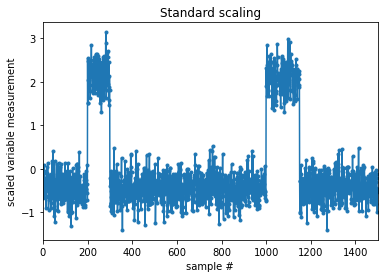

In [6]:
# Transform via standard scaling
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# mean and std
print('Estimated mean = ', scaler.mean_[0])
print('Estimated standard deviation = ', np.sqrt(scaler.var_[0]))

# plot
plt.figure()
plt.plot(X_scaled, '.-')
plt.xlabel('sample #'), plt.ylabel('scaled variable measurement')
plt.xlim((0,1500))
plt.title('Standard scaling')
plt.show()

Estimated robust location =  40.19122190455728
Estimated robust spread =  [1.23078184]


C:\Users\f0ne44\AppData\Local\Temp/ipykernel_3928/1741589865.py:5: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  MAD = stats.median_absolute_deviation(X)


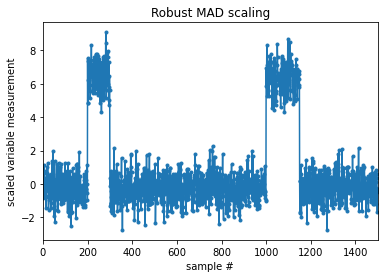

In [8]:
# Transform via robust MAD scaling
# compute median and MAD
from scipy import stats
median = np.median(X)
MAD = stats.median_absolute_deviation(X)

# scale
X_scaled = (X - median)/MAD[0]

# median and MAD
print('Estimated robust location = ', median)
print('Estimated robust spread = ', MAD)

# plot
plt.figure()
plt.plot(X_scaled, '.-')
plt.xlabel('sample #'), plt.ylabel('scaled variable measurement')
plt.xlim((0,1500))
plt.title('Robust MAD scaling')
plt.show()